In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


## Merging datasets

In [17]:
fake = pd.read_csv("Fake.csv")
real = pd.read_csv("True.csv")

fake["label"] = 0
real["label"] = 1

df = pd.concat([fake, real])
df = df.sample(frac=1).reset_index(drop=True)


## Visualizations

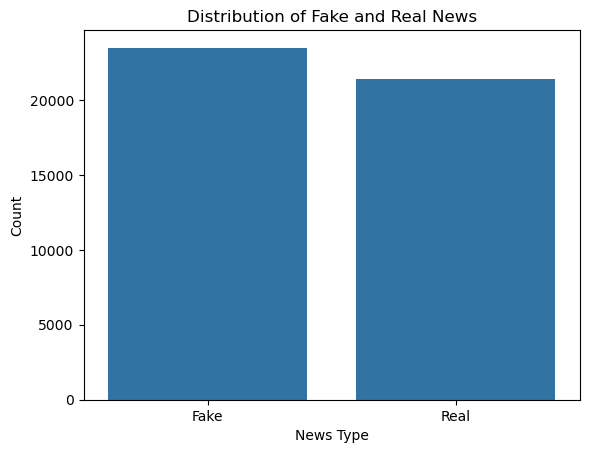

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.xticks([0,1], ['Fake', 'Real'])
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()


In [19]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


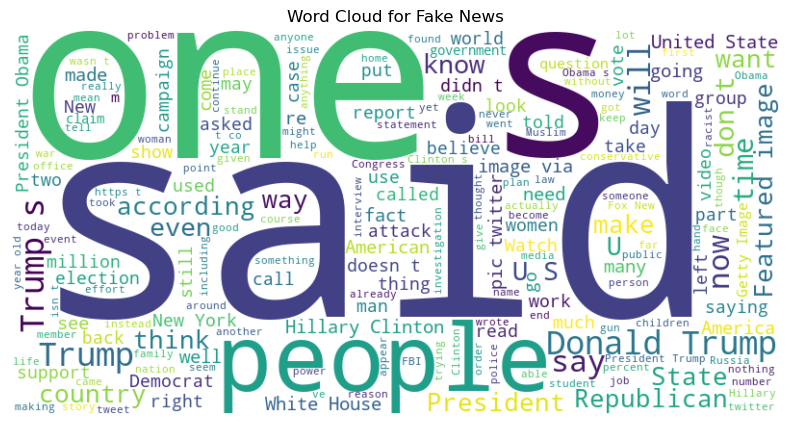

In [20]:
from wordcloud import WordCloud

all_text = ' '.join(df[df['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')
plt.show()


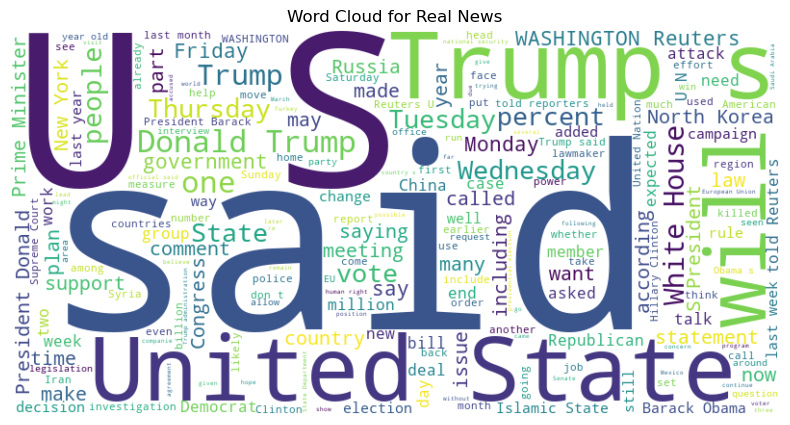

In [21]:
all_text_real = ' '.join(df[df['label'] == 1]['text'])
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(all_text_real)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Real News')
plt.show()


## Preprocessing

In [24]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"[^a-zA-Z]", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    return text

df['text'] = df['title'] + " " + df['text']
df['text'] = df['text'].apply(clean_text)


## TF-IDF

In [25]:
tfidf = TfidfVectorizer(stop_words="english", max_df=0.7, min_df=5, ngram_range=(1, 2),max_features=10000)
X = tfidf.fit_transform(df["text"])
y = df["label"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## ML Models 

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [28]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)


In [29]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


## Evaluation

0.989532293986637
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4688
           1       0.99      0.99      0.99      4292

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



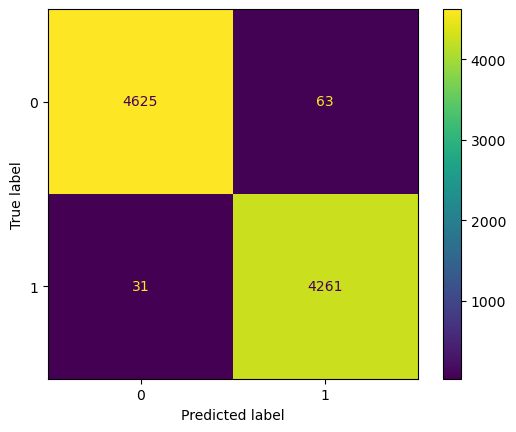

In [30]:
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)


0.9498886414253898
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4688
           1       0.95      0.95      0.95      4292

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



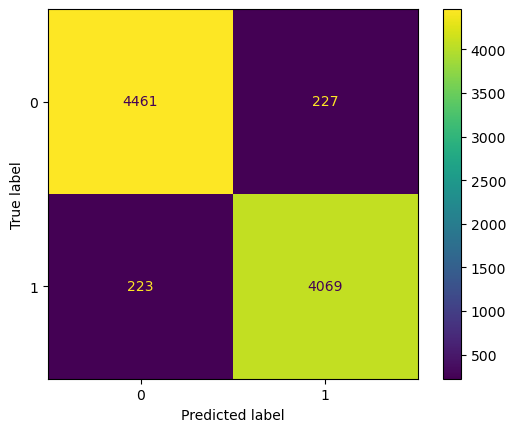

In [32]:
print(accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)


0.9964365256124722
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4688
           1       0.99      1.00      1.00      4292

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



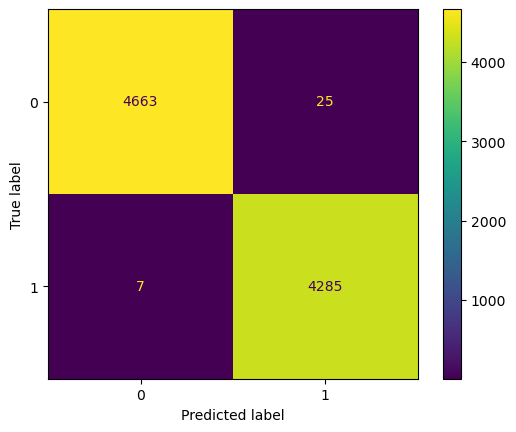

In [33]:
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
